In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D

from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [5]:
def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/archive1.zip", header=0, compression='zip')

    return dataSet

In [6]:
def encodeData(dataSet=0):
    dataSet.dropna(inplace=True)

    # Remove any 'neutral' ratings
    dataSet['sentiment'] = ["negative" if x == "neutral" else x for x in dataSet['sentiment']]
    dataSet['sent_analysis'] = np.where(dataSet['sentiment'] == "positive", 1, 0)
    datos = ['text', 'sent_analysis']
    misDatos = dataSet[datos]

    return misDatos

In [8]:
datos = leeDatos()
print(datos)
print("\n")

encodeDatos = encodeData(datos)
print(encodeDatos)
print("\n")
print(encodeDatos['sent_analysis'].mean())
print("\n")

     Year  Month  Day Time of Tweet  \
0    2018      8   18       morning   
1    2018      8   18          noon   
2    2017      8   18         night   
3    2022      6    8       morning   
4    2022      6    8          noon   
..    ...    ...  ...           ...   
494  2015     10   18         night   
495  2021      2   25       morning   
496  2022      5   30          noon   
497  2018      8   10         night   
498  2019      3   25       morning   

                                                  text sentiment     Platform  
0                What a great day!!! Looks like dream.  positive    Twitter    
1       I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                       Don't angry me  negative     Facebook  
3    We attend in the class just for listening teac...  negative    Facebook   
4                    Those who want to go, let them go  negative   Instagram   
..                                                 

In [9]:
ts_size = .25
trainSet, testSet = train_test_split(encodeDatos, test_size=ts_size, shuffle=False, random_state=0)
print(trainSet)
print('trainSet shape: ', trainSet.shape)
print(testSet)
print('testSet shape: ', testSet.shape)
print("\n")

                                                  text  sent_analysis
0                What a great day!!! Looks like dream.              1
1       I feel sorry, I miss you here in the sea beach              1
2                                       Don't angry me              0
3    We attend in the class just for listening teac...              0
4                    Those who want to go, let them go              0
..                                                 ...            ...
369       l`m on 3 days too matt. No fun this weekend.              0
370   u really don`t think so?  maybe ur right....l...              0
371             I feel your pain. Mine is the same way              0
372                             comes home in two days              0
373               Sadly no. It didn`t come with one...              0

[374 rows x 2 columns]
trainSet shape:  (374, 2)
                                                  text  sent_analysis
374                   Cant wait to see m

In [10]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

training_sentences= trainSet['text']
training_labels = trainSet['sent_analysis']
testing_sentences = testSet['text']
testing_labels = testSet['sent_analysis']

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
MLP_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    GlobalAveragePooling1D(),
                    Flatten(),
                    Dense(16, activation='relu', name="Hidden_layer"),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [14]:
opt = 'adam'
loss_fun = 'binary_crossentropy'
acc = ['accuracy']

In [15]:
MLP_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [16]:
MLP_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer (Dense)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
num_epochs = 30

MLP_history = MLP_model.fit(training_padded,
                    training_labels,
                    validation_split=0.25,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
9/9 - 3s - 327ms/step - accuracy: 0.6357 - loss: 0.6831 - val_accuracy: 0.7447 - val_loss: 0.6515
Epoch 2/30
9/9 - 0s - 36ms/step - accuracy: 0.6357 - loss: 0.6660 - val_accuracy: 0.7447 - val_loss: 0.6254
Epoch 3/30
9/9 - 0s - 10ms/step - accuracy: 0.6357 - loss: 0.6577 - val_accuracy: 0.7447 - val_loss: 0.6069
Epoch 4/30
9/9 - 0s - 8ms/step - accuracy: 0.6357 - loss: 0.6551 - val_accuracy: 0.7447 - val_loss: 0.5969
Epoch 5/30
9/9 - 0s - 18ms/step - accuracy: 0.6357 - loss: 0.6545 - val_accuracy: 0.7447 - val_loss: 0.5959
Epoch 6/30
9/9 - 0s - 10ms/step - accuracy: 0.6357 - loss: 0.6543 - val_accuracy: 0.7447 - val_loss: 0.5943
Epoch 7/30
9/9 - 0s - 12ms/step - accuracy: 0.6357 - loss: 0.6539 - val_accuracy: 0.7447 - val_loss: 0.5946
Epoch 8/30
9/9 - 0s - 11ms/step - accuracy: 0.6357 - loss: 0.6537 - val_accuracy: 0.7447 - val_loss: 0.5945
Epoch 9/30
9/9 - 0s - 13ms/step - accuracy: 0.6357 - loss: 0.6538 - val_accuracy: 0.7447 - val_loss: 0.5964
Epoch 10/30
9/9 - 0s - 15ms/

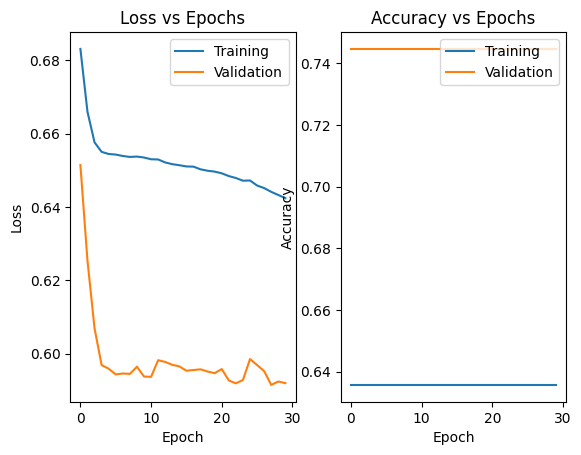

In [18]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(MLP_history.history['loss'])
plt.plot(MLP_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(MLP_history.history['accuracy'])
plt.plot(MLP_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [19]:
CNN_model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                    AveragePooling1D(pool_size=3),
                    Flatten(),
                    Dense(2, activation='relu'),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

In [45]:
CNN_model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [46]:
CNN_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
CNN_history = CNN_model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
11/11 - 0s - 17ms/step - accuracy: 0.9315 - loss: 0.2657 - val_accuracy: 0.6842 - val_loss: 0.5841
Epoch 2/30
11/11 - 0s - 20ms/step - accuracy: 0.9405 - loss: 0.2592 - val_accuracy: 0.6842 - val_loss: 0.5878
Epoch 3/30
11/11 - 0s - 9ms/step - accuracy: 0.9435 - loss: 0.2530 - val_accuracy: 0.6579 - val_loss: 0.5925
Epoch 4/30
11/11 - 0s - 15ms/step - accuracy: 0.9435 - loss: 0.2476 - val_accuracy: 0.6842 - val_loss: 0.5953
Epoch 5/30
11/11 - 0s - 9ms/step - accuracy: 0.9851 - loss: 0.2418 - val_accuracy: 0.6579 - val_loss: 0.5921
Epoch 6/30
11/11 - 0s - 15ms/step - accuracy: 0.9851 - loss: 0.2362 - val_accuracy: 0.6579 - val_loss: 0.5971
Epoch 7/30
11/11 - 0s - 14ms/step - accuracy: 0.9881 - loss: 0.2314 - val_accuracy: 0.6579 - val_loss: 0.6010
Epoch 8/30
11/11 - 0s - 9ms/step - accuracy: 0.9911 - loss: 0.2267 - val_accuracy: 0.6579 - val_loss: 0.6047
Epoch 9/30
11/11 - 0s - 15ms/step - accuracy: 0.9940 - loss: 0.2229 - val_accuracy: 0.6579 - val_loss: 0.6088
Epoch 10/30
1

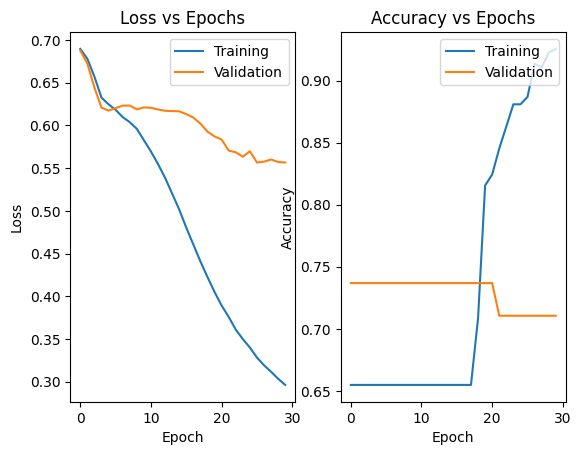

In [48]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [58]:
# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['MLP pred'] = MLP_model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['CNN pred'] = CNN_model.predict(testing_padded).reshape(1,len(testing_padded))[0]

print(round(df_test))
print("\n")

df_perf = pd.DataFrame()
df_perf['MLP'] = MLP_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf['CNN'] = CNN_model.evaluate(testing_padded,testing_labels, verbose=2)
df_perf.index = ['Loss', 'Accuracy']
print(df_perf)
print("\n")

report = classification_report(testing_labels, round(df_test['MLP pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")

report = classification_report(testing_labels, round(df_test['CNN pred']), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
print("\n")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
     real  MLP pred  CNN pred
0       1       0.0       0.0
1       0       1.0       0.0
2       0       1.0       0.0
3       1       0.0       0.0
4       1       1.0       0.0
..    ...       ...       ...
120     0       1.0       0.0
121     0       0.0       0.0
122     0       0.0       0.0
123     1       0.0       0.0
124     0       1.0       0.0

[125 rows x 3 columns]


4/4 - 0s - 9ms/step - accuracy: 0.5120 - loss: 0.8796
4/4 - 0s - 9ms/step - accuracy: 0.6720 - loss: 0.7579
               MLP       CNN
Loss      0.879612  0.757946
Accuracy  0.512000  0.672000


              precision    recall  f1-score  support
0              0.676471  0.541176  0.601307   85.000
1              0.315789  0.450000  0.371134   40.000
accuracy       0.512000  0.512000  0.512000    0.512
macro avg      0.496130  0.495588  0.486221  125.000
weighted avg   0.561053  0.512000  0.527652  125.000


              precisi